In [1]:
!pip install matplotlib
!pip install deap


In [2]:

import random

from deap import base, creator, tools, algorithms

def evaluate(individual):
    return random.random(),

# Define genetic algorithm parameters

POPULATION_SIZE = 10

GENERATIONS = 5

# Create types for fitness and individuals in the genetic algorithm

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

creator.create("Individual", list, fitness=creator.FitnessMin)

# Initialize toolbox

toolbox = base.Toolbox()

# Define attributes and individuals

toolbox.register("attr_neurons", random.randint, 1, 100)  # Example: number of neurons

toolbox.register("attr_layers", random.randint, 1, 5)  # Example: number of layers

toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.attr_neurons,

                                                                      toolbox.attr_layers), n=1)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Genetic operators

toolbox.register("evaluate", evaluate)

toolbox.register("mate", tools.cxTwoPoint)

toolbox.register("mutate", tools.mutUniformInt, low=1, up=100, indpb=0.2)

toolbox.register("select", tools.selTournament, tournsize=3)

# Create initial population

population = toolbox.population(n=POPULATION_SIZE)

# Run the genetic algorithm

for gen in range(GENERATIONS):

    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.1)

    fitnesses = toolbox.map(toolbox.evaluate, offspring)

    for ind, fit in zip(offspring, fitnesses):

        ind.fitness.values = fit

    population = toolbox.select(offspring, k=len(population))

# Get the best individual from the final population

best_individual = tools.selBest(population, k=1)[0]

best_params = best_individual

# Print the best parameters found

print("Best Parameters:", best_params)






Best Parameters: [42, 5]


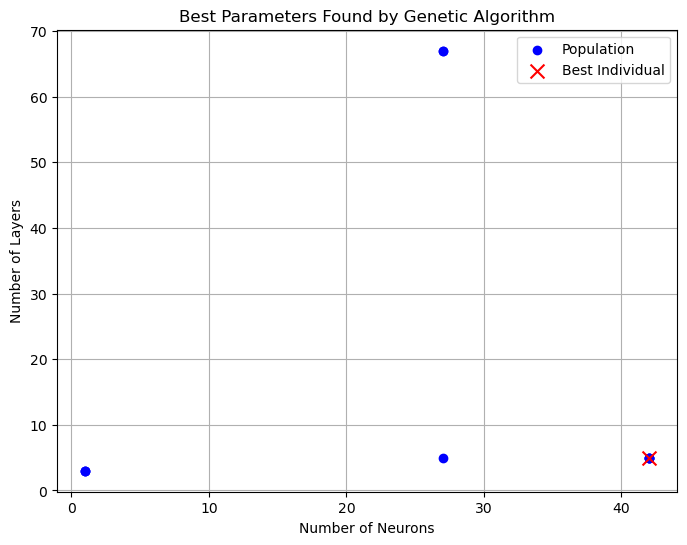

In [3]:
import matplotlib.pyplot as plt

# Extract the number of neurons and number of layers for each individual in the final population
neurons = [ind[0] for ind in population]
layers = [ind[1] for ind in population]

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(neurons, layers, c='b', label='Population')
plt.scatter(best_params[0], best_params[1], c='r', label='Best Individual', marker='x', s=100)
plt.xlabel('Number of Neurons')
plt.ylabel('Number of Layers')
plt.title('Best Parameters Found by Genetic Algorithm')
plt.legend()
plt.grid(True)
plt.show()